# Phase 1: Data loading and preprocessing

'file' content is downloaded from: https://www.kaggle.com/datasets/munkialbright/classified-tweets

In [28]:
#Importing needed modules.

from pandas import read_csv , concat , DataFrame
from random import sample , seed
from pickle import dump
from matplotlib.pyplot import pie , title , show , plot ,legend , xlabel , ylabel
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding , GlobalMaxPooling1D , Dense
from tensorflow.keras.models import Sequential

#Instancing from "Tokenizer" object.

tokenizer = Tokenizer(oov_token='<00U00>')

1 : racist 0 : not-racist

In [29]:
#Data loading.

file = read_csv('classified_tweets.csv')
df = file.copy()
df.sample(10)

,text,suspicious,cyberbullying,hate,suicidal
15523,@Bearcats_RX This is the laziest excuse for co...,0,0,0,0
4983,You bash Nickelback but you listen to Staind?...,1,0,0,0
12346,@JenniferCohagen @PCraigRoberts One more Putin...,1,1,1,0
15406,I'm almost in sniffles at the thought of seein...,0,0,0,0
15929,"I think I need to make a Facebook page, too. U...",0,0,0,0
8935,Have you tried 'fuck' and 'Fuck'? (yes they a...,1,0,0,0
14835,"But marge, I'm missing the chili cook off! #MK...",0,0,0,0
17267,@MaryTrigiani thanks. ;),0,0,0,0
414,call me emo again and i'll cut myself,1,0,0,1
12789,@OzyRatisbon You mean it shouldn't be? Becaus...,1,2,2,0


According to the file description on the website values 1 in cyberbullying column contains Racism content, values 2 contains Sexism content and values 0 contains none of them.

In [30]:
df.cyberbullying.value_counts()

cyberbullying
0    17256
2     1733
1      945
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19934 non-null  object
 1   suspicious     19934 non-null  int64 
 2   cyberbullying  19934 non-null  int64 
 3   hate           19934 non-null  int64 
 4   suicidal       19934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 778.8+ KB


In [32]:
#Removing texts that contains less than 3 words.

df = DataFrame([i for i in df.to_numpy() if len(i[0].split())>2],columns=df.columns)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19082 entries, 0 to 19081
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19082 non-null  object
 1   suspicious     19082 non-null  int64 
 2   cyberbullying  19082 non-null  int64 
 3   hate           19082 non-null  int64 
 4   suicidal       19082 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 745.5+ KB


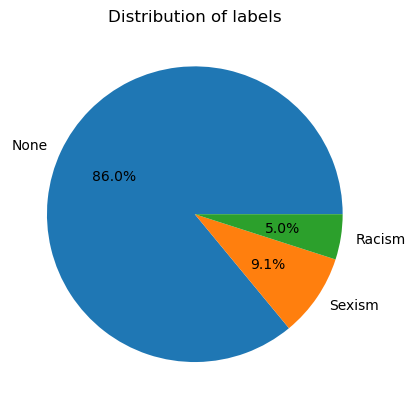

In [34]:
pie(df.cyberbullying.value_counts().values,labels=['None','Sexism','Racism'],autopct='%1.1f%%')
title('Distribution of labels')
show()

Distribution of labels are not balanced and definitely it breeds problems in training phase. 

In order to add some data another file can be helpful.

'file2' content is downloaded from: https://www.kaggle.com/datasets/rishabhjohri/racismdetectiondataset

In [35]:
#Data loading

file2 = read_csv('RacismDetectionDataSet.csv')
df2 = file2.copy()
df2.columns = ['text','cyberbullying']
df2.sample(10)

,text,cyberbullying
1475,I hate my local council,0
1576,"Dear Jews, stop saying you have pure intention...",0
1322,All LGBT Community should die,0
1006,I can not just sit up and HATE on another bitc...,0
1451,i hate the torys,0
1755,women should be seen but not heard,0
1306,cummings is fucking up this country,0
373,theres only one race its nerf or nothing,1
1520,Why are all french people so selfish,0
1712,I'll do whatever it takes to erase all niqabis...,0


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           1999 non-null   object
 1   cyberbullying  1999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [37]:
#1 : Racsim , 0: No-racism.

df2.cyberbullying.value_counts()

cyberbullying
1    1000
0     999
Name: count, dtype: int64

In [38]:
#Seperating rows with value 1.

df2 = df2[df2.cyberbullying==1]

In [39]:
#Separating rows with value 1 in first dataframe from cyberbullying column..

one_df = df[df.cyberbullying==1]

#Adding Racism texts from second dataframe to the first one. 

one_df = concat([one_df,df2],axis=0)

#Separating rows with value 0 in first dataframe from cyberbullying column.

zero_df = df[df.cyberbullying==0]

seed(123)

#Selecting randomly from No-rasicm texts in first dataframe as same length as 'one_df' dataframe.

select = DataFrame(sample(zero_df.to_numpy().tolist(),len(one_df)),columns=zero_df.columns)

#Making an unique dataframe from them.

final = concat([one_df,select],axis=0)
final = final[['text','cyberbullying']]

#Shuffling the final dataframe.

final = DataFrame(sample(final.to_numpy().tolist(),len(final)),columns=final.columns)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           3890 non-null   object
 1   cyberbullying  3890 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.9+ KB


In [40]:
final.cyberbullying.value_counts()

cyberbullying
0    1945
1    1945
Name: count, dtype: int64

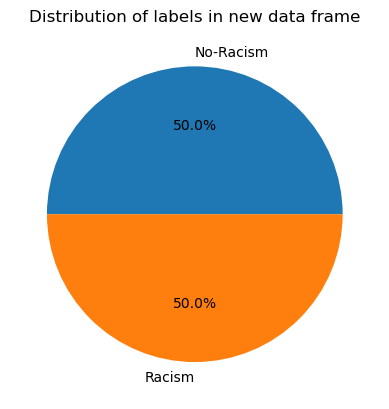

In [41]:
pie(final.cyberbullying.value_counts().values,labels=['No-Racism','Racism'],autopct='%1.1f%%')
title('Distribution of labels in new data frame')
show()

In [42]:
#Creating a function to remove stop words from each text.

def Filter(text)->str:
    '''Function Docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [43]:
#Removing stopwords from texts.

features = [Filter(text) for text in final.text]

#Encoding each text words.

tokenizer.fit_on_texts(features)

#Saving the tokenizer object.

with open('tknizer_R.pkl','wb') as target_file:
    dump(tokenizer,target_file)
    
#Making sequences of numbers from encoded texts.    

sequences = tokenizer.texts_to_sequences(features)

#Making a shaped matrix from sequences.

max_len = 16
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=max_len)
matrix.shape

(3890, 16)

# Phase 2: Modeling, Training and Evaluating

In [44]:
#Creating an embedding deep neural network from scratch.

model = Sequential([Embedding(len(tokenizer.word_index)+1,64,input_length=max_len),
                    GlobalMaxPooling1D(),
                    Dense(1,activation='sigmoid')])

#Compiling the model.

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
tr_size = int(input('Enter train size in percent:'))

idx = (tr_size*len(matrix))//100

idx_val = ((tr_size+10)*len(matrix))//100

#Making train set.

xtr , ytr = matrix[:idx],final.cyberbullying.to_numpy()[:idx]

#Making validation set.

xval , yval = matrix[idx:idx_val],final.cyberbullying.to_numpy()[idx:idx_val]

#Making test set.

xts , yts = matrix[idx_val:],final.cyberbullying.to_numpy()[idx_val:]

Enter train size in percent:80


80% percent of data in considered as train set, 10% as validation set and 10% as test set.

In [46]:
print('Train size:',len(xtr))
print('Validation size:',len(xval))
print('Test size',len(xts))

Train size: 3112
Validation size: 389
Test size 389


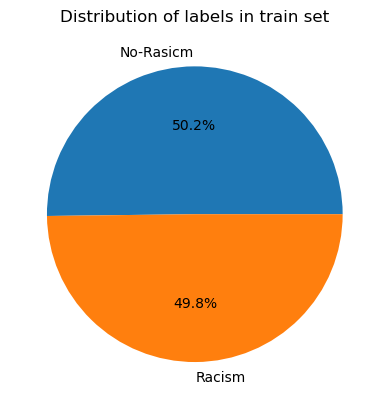

In [47]:
pie([ytr.tolist().count(0),ytr.tolist().count(1)],labels=['No-Rasicm','Racism'],autopct='%1.1f%%')
title('Distribution of labels in train set')
show()

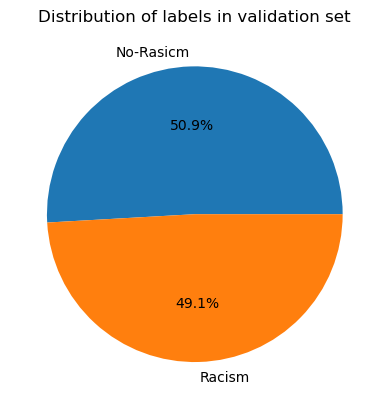

In [48]:
pie([yval.tolist().count(0),yval.tolist().count(1)],labels=['No-Rasicm','Racism'],autopct='%1.1f%%')
title('Distribution of labels in validation set')
show()

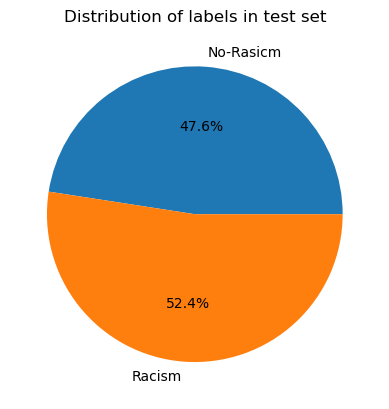

In [49]:
pie([yts.tolist().count(0),yts.tolist().count(1)],labels=['No-Rasicm','Racism'],autopct='%1.1f%%')
title('Distribution of labels in test set')
show()

In [50]:
#Data train.

history = model.fit(xtr,ytr,epochs=10,validation_data=(xval,yval))

Epoch 1/10
98/98 [==============================] - 1s 5ms/step - loss: 0.6765 - accuracy: 0.5977 - val_loss: 0.6464 - val_accuracy: 0.7918
Epoch 2/10
98/98 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.9001 - val_loss: 0.5209 - val_accuracy: 0.8817
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.9470 - val_loss: 0.3907 - val_accuracy: 0.9049
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.2823 - accuracy: 0.9560 - val_loss: 0.3192 - val_accuracy: 0.9100
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9656 - val_loss: 0.2811 - val_accuracy: 0.9126
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9714 - val_loss: 0.2589 - val_accuracy: 0.9152
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9769 - val_loss: 0.2450 - val_accuracy: 0.9152
Epoch 8/10
98/98 [==

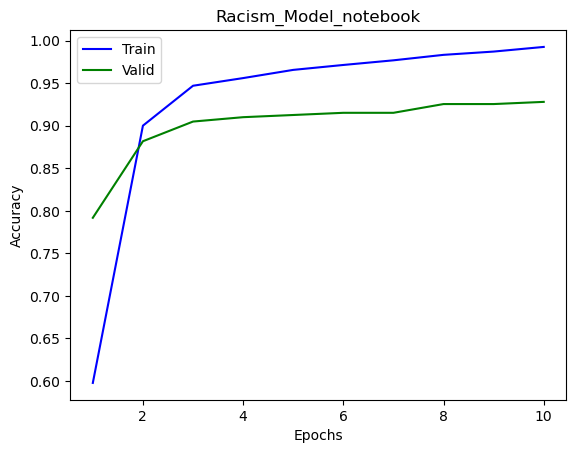

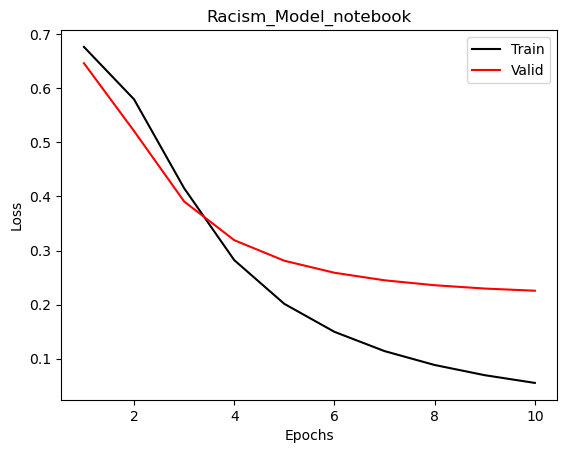

In [51]:
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['accuracy'],'blue')
plot(epoch,results['val_accuracy'],'green')
xlabel('Epochs')
ylabel('Accuracy')
title('Racism_Model_notebook')
legend(['Train','Valid'])
show()
plot(epoch,results['loss'],'black')
plot(epoch,results['val_loss'],'red')
xlabel('Epochs')
ylabel('Loss')
title('Racism_Model_notebook')
legend(['Train','Valid'])
show()

In [52]:
#evaluating on the test set.

model.evaluate(xts,yts)

13/13 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9075


[0.24096277356147766, 0.9074550271034241]

In [53]:
#Saving the model.

model.save('Racism_detection_model')

INFO:tensorflow:Assets written to: Racism_detection_model\assets


INFO:tensorflow:Assets written to: Racism_detection_model\assets


# End